<a href="https://colab.research.google.com/github/viridis45/Python-data-analysis/blob/master/Basic_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import seaborn as sns
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


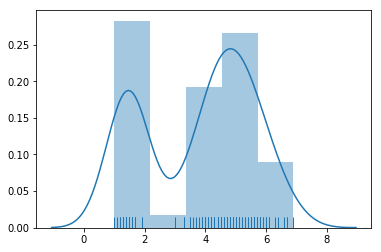

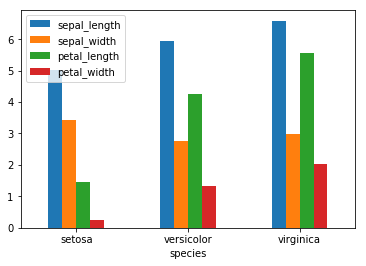

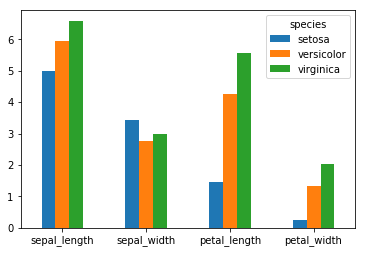

In [60]:
x = iris.petal_length.values
#sns.kdeplot(x) #Kernal Density estimation
sns.distplot(x, kde=True, rug=True) 
# print(iris.head(3))
# print(iris.groupby('species').mean())
data = iris.groupby('species').mean()
data.plot.bar(rot=0)
data.T.plot.bar(rot=0)

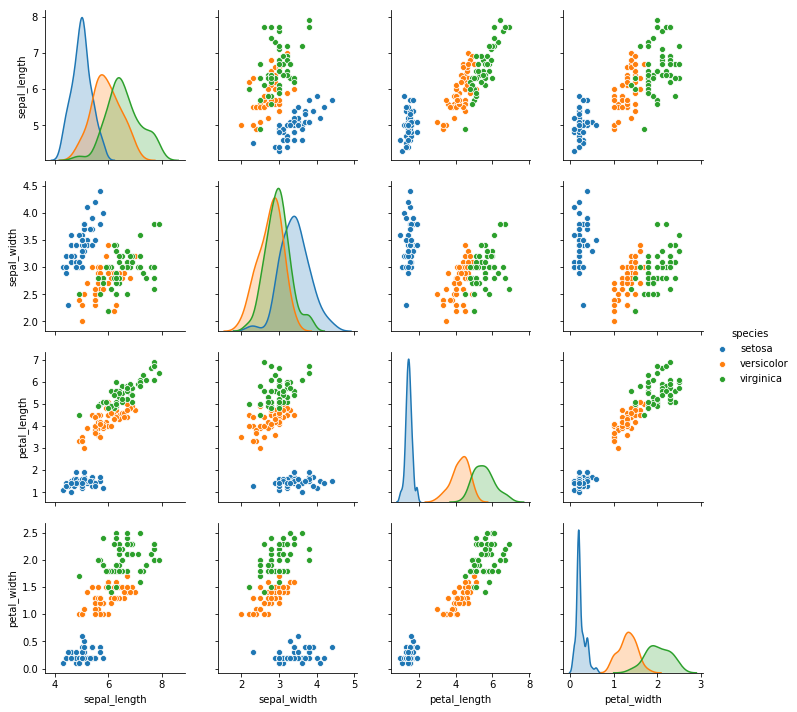

In [61]:
sns.pairplot(iris, hue='species')

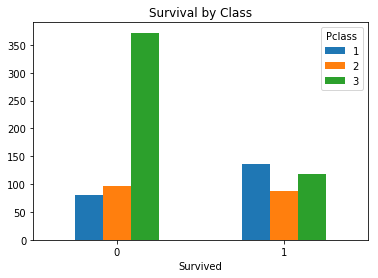

In [66]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# drive.mount('/content/drive')
# root = '/content/drive/My Drive/colab/titanic/train.csv'
df1 = pd.read_csv(root)
df1.head(3)

titanic['class']
#sns.countplot(x='class', data=titanic)
titanic.groupby('survived')['class'].value_counts()
pd.pivot_table(titanic, index='class', columns='sex', aggfunc='size')
titanic.groupby('class')['sex'].value_counts()

df_pc = pd.pivot_table(df1, index='Survived', columns='Pclass', aggfunc='size')
df_pc.plot.bar(rot=0, title='Survival by Class')

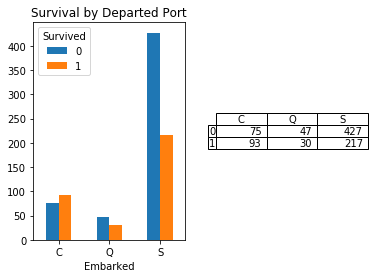

In [56]:
df_sex = pd.pivot_table(df1, index='Survived', columns='Embarked', aggfunc='size')

ax1 = plt.subplot(121)#, aspect='equal')
df_sex.T.plot.bar(ax=ax1, rot=0, title='Survival by Departed Port')

ax2 = plt.subplot(122)
plt.axis('off')
tbl = pd.plotting.table(ax2, df_sex, loc='center')
plt.show()

Text(0.5, 1.0, 'Pie chart would be a better choice tho')

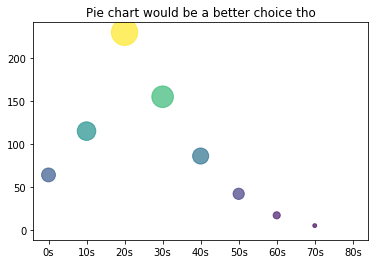

In [72]:
df2 = pd.DataFrame(df1['Age'].value_counts(sort=False, bins=np.arange(0,100,10)))
index2 = ['0s','10s','20s','30s','40s','50s','60s','70s','80s']
df2.index = index2
s= (df2['Age']) *3

plt.scatter(x=index2, y=df2['Age'], c = df2['Age'], s = s, alpha=0.7)
plt.title('Pie chart would be a better choice tho')

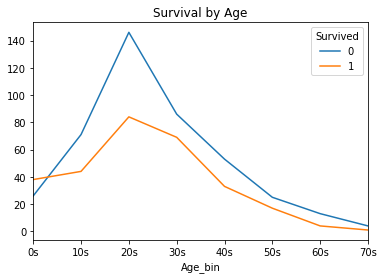

In [43]:
df1['Age_bin'] = pd.cut(df1['Age'], bins=np.arange(0,100,10), labels=index2)
df2 = pd.pivot_table(df1,index='Survived', columns='Age_bin', aggfunc='size')
df2.head(3)
df2.T.plot.line(rot=0, title='Survival by Age')


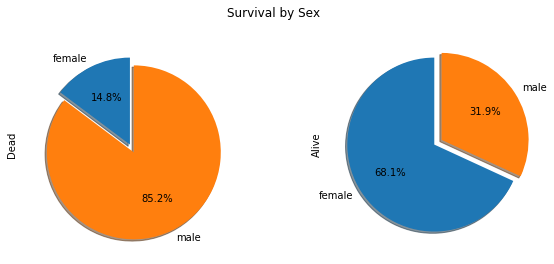

In [67]:
df_sex = pd.pivot_table(df1, index='Survived', columns='Sex', aggfunc='size')
df_sex.index=['Dead' ,'Alive']
explode=(0,0.1)
plot = df_sex.T.plot.pie(rot=0,title='Survival by Sex', subplots=True, legend=False, 
                         shadow=True, explode=explode, startangle=90, autopct='%1.1f%%', figsize=(10,4))

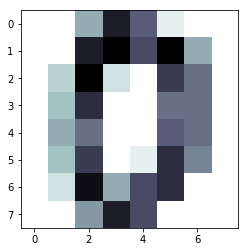

In [44]:
#imshow:2차원 이미지 데이터를 색상으로 표시
from sklearn.datasets import load_digits
digits=load_digits()
len(digits)
x=digits.images[0]
plt.imshow(x, cmap=plt.cm.bone_r,interpolation='nearest')

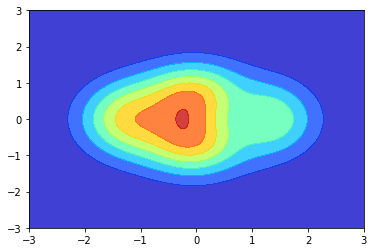

In [49]:
def myFunc(x,y):
    return (1-x/2+x**4+y**2)*np.exp(-x**2-y**2)
x=np.linspace(-3,3,256)
y=np.linspace(-3,3,256)
xx,yy=np.meshgrid(x,y)#meshgrid:등고선을 그리고자 하는 대상 데이터를 나타내는 행렬
zz=myFunc(xx,yy)

plt.contourf(xx,yy,zz, alpha=.75, cmap='jet')